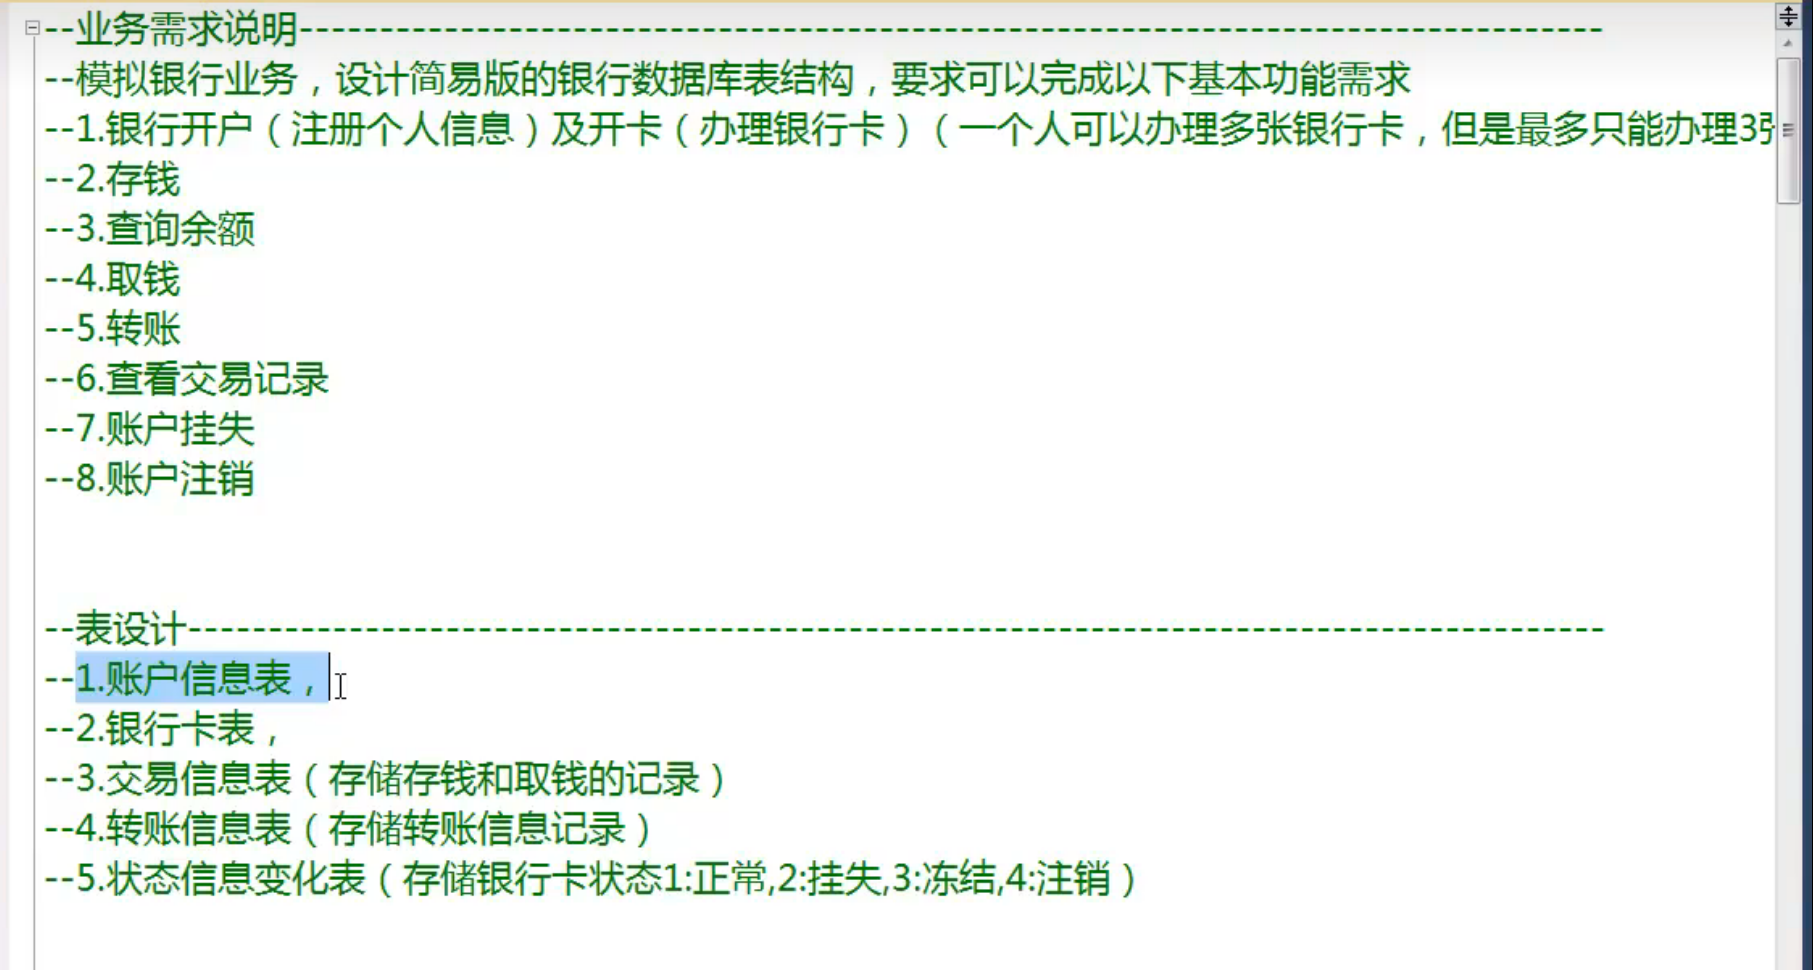

In [ ]:
create table AccountInfo --账户信息表
(
    AccountID int primary key identity(1,1),
    AccountCode varchar(20) not null,
    AccountPhone varchar(20) not null,
    RealName varchar(20) not null,
    OpenTime smalldatetime not null
    
)

create table BankCard --银行卡
(
    CardNo varchar(30) primary key,
    AccountID int not null,
    CardPwd varchar(30) not null,
    CardMoney money not null,
    CardState int not null,--1.正常 2.挂失 3.冻结 4.注销
    CardTime smalldatetime DEFAULT(getdate())
)

create table CardExchange --交易信息
(
    ExchangeID int primary key identity(1,1),
    CardNo varchar(30) not null,
    MoneyInBank money not null, --存钱操作
    MoneyOutBank money not null, --取钱操作
    ExchangeTime smalldatetime not null --交易时间
)

create table CardTransfer --转账信息表
(
    TransferID int primary key identity(1,1),
    CardNoOut varchar(30) not null, --转出卡号
    CardNoIn varchar(30) not null ,
    TransferMoney money not null,--交易金额
    TransferTime smalldatetime not null --交易时间
)

In [ ]:
Create DataBase DBTEST
On 
(
    name = 'DBTEST'
)

In [ ]:
Create DataBase DataBaseWork
on
(
	name = 'MainData',
	filename = 'D:\DB\MainData.mdf',
	size = 5MB,
	filegrowth = 2MB
)
Log on 
(
	name = 'MainData._log',
	filename = 'D:\DB\MainData.ldf',
	size =5MB,
	filegrowth = 2MB
)

USE DataBaseWork
go

create table BankExchange
(
	CardID int,
	ExchangTime time,
	ExchangeMoney money,
	Constraint PK_BankExchange primary key(CardID,ExchangTime,ExchangeMoney ASC)
)
create table CardInfo
(
	CardID int primary key,
	Realname nvarchar(4),
	IdentityID int
)

Alter table BankExchange
add constraint FK_BankExchange foreign key(CardID) references CardInfo(CardID)

